# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/Module%205-%20Deep%20Computer%20Vision/CNN_python/Module%205-%20CNN_Fashion_MNIST_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 5- Deep Computer Vision- Convolutional Neural Networks (CNN)

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow https://www.tensorflow.org/install



In [1]:
import tensorflow
tensorflow.__version__

'2.17.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the data

In this notebook, we will be working with fashion mnist data set: https://www.kaggle.com/datasets/zalando-research/fashionmnist
* 60,000 train images
* 10,000 test images
* image size (28,28)

**Labels**

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


The data set is balanced!

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
from collections import Counter
Counter(y_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

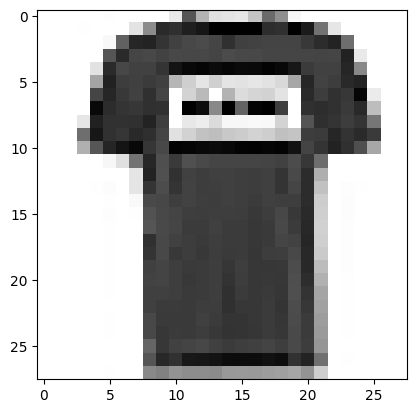

In [8]:
plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [9]:
y_train[1]

0

# Target Variable Handling in Multi-Class Classification

There are two main ways we can handle the target variable in multi-class classification:

1. Using one-hot encoding + categorical_crossentropy loss function
2. Using integer labels + sparse_categorical_crossentropy loss function

When it comes to multi-class classification, both methods can effectively train a model to predict the correct class. However, there are considerations for each approach:

## Benefits of One-Hot Encoding:
* No implied ordering: Ensures the model doesn't assume any inherent order among classes.
* Clear interpretation: Provides an easily interpretable representation of classes, with each class represented by a binary vector.
* Flexibility: Allows for easy extension to multi-label classification if needed.

## Benefits of Integer Labels with Sparse Categorical Cross-Entropy:
* Memory efficiency: Particularly beneficial for large datasets like CIFAR, as it requires less memory than one-hot encoding.
* Computational efficiency: Can speed up training, especially on large datasets.
* Direct use of labels: Often allows for using dataset labels without preprocessing.

## Recent Trends:
In recent years, there's been a growing preference for using integer labels with sparse categorical cross-entropy, especially for large datasets and deep learning frameworks. This trend is driven by:

1. Improved handling in modern frameworks: Libraries like TensorFlow and Keras have optimized support for sparse categorical cross-entropy.
2. Scalability: More efficient for datasets with a large number of classes.
3. Equivalent performance: Despite using integer labels, sparse categorical cross-entropy doesn't assume ordinal relationships between classes and performs equivalently to categorical cross-entropy in practice.

## Conclusion:
Both methods remain valid, and the choice often depends on specific project requirements, dataset size, and personal preference. For many current applications, especially with larger datasets, the trend leans towards using integer labels with sparse categorical cross-entropy due to its efficiency benefits. However, one-hot encoding remains a solid choice, particularly for its explicit representation of categories and potential benefits in certain scenarios (e.g., multi-label classification, label smoothing).

In [10]:
y_train.shape

(60000,)

In [11]:
from tensorflow.keras.utils import to_categorical
y_train_ohe = to_categorical(y_train, num_classes=10)
y_train_ohe.shape

(60000, 10)

In [12]:
# alternative way to do one hot encoding
import tensorflow as tf
y_test_ohe = tf.one_hot(y_test, depth=10)
y_test_ohe.shape

TensorShape([10000, 10])

# Creating an ANN model as benchmark
let's start by an ANN model and see how we can improve that. We are not trying to optimize the ANN model, so let's do a quick sequential approach.

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [14]:
print(f'Train set shape is: {x_train.shape}')
print(f'Test set shape is: {x_test.shape}')

Train set shape is: (60000, 28, 28)
Test set shape is: (10000, 28, 28)


In [15]:
# we need to flatten images and pass it to a FCN.
x_train_ann = x_train.reshape(60000, 28*28)
x_train_ann = x_train_ann / 255.0

x_test_ann = x_test.reshape(10000, 28*28)
x_test_ann = x_test_ann / 255.0

In [16]:
x_train_ann.shape

(60000, 784)

In [17]:
ann_model = keras.Sequential(name="ann_mnist")
ann_model.add(layers.Input(shape=(784,))) # this is the shape of each sample!
ann_model.add(layers.Dense(units = 512, activation = 'relu', name="first_layer"))

#output layer
ann_model.add(layers.Dense(units = 10, activation = 'softmax', name="output_layer"))

In [18]:
ann_model.summary()

Model: "ann_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_layer (Dense)             │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#params
784*512+512


401920

In [20]:
512*10+10

5130

In [21]:
ann_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="ANN_benchmark.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [25]:
ann_model.fit(x_train_ann, y_train_ohe, validation_data=(x_test_ann, y_test_ohe), epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7389 - loss: 0.7740 - val_accuracy: 0.8293 - val_loss: 0.4517
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8549 - loss: 0.4002 - val_accuracy: 0.8553 - val_loss: 0.3993
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8739 - loss: 0.3431 - val_accuracy: 0.8630 - val_loss: 0.3714
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8857 - loss: 0.3129 - val_accuracy: 0.8719 - val_loss: 0.3467
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8916 - loss: 0.2925 - val_accuracy: 0.8755 - val_loss: 0.3507
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8985 - loss: 0.2727 - val_accuracy: 0.8807 - val_loss: 0.3372
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9006 - loss: 0.2669 - val_accuracy: 0.8853 - val_loss: 0.3289
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.2491 - val_accuracy: 0.

In [27]:
test_model = keras.models.load_model("ANN_benchmark.keras")
test_model.evaluate(x_test_ann, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8944 - loss: 0.3272


[0.32581856846809387, 0.8946999907493591]

ANN accuracy in the test set is around 89%. We want to see how CNN improves this accuracy.

# Convolutional Neural Networks (CNN)

In [28]:
# reshaping
x_train.shape

(60000, 28, 28)

In [29]:
x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0

x_test = x_test.reshape((10000, 28,28,1))
x_test  = x_test / 255.0

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
x_test.shape

(10000, 28, 28, 1)

## Creating a CNN model:

This is the benchmark CNN we build. No regularization (no drop out or data augmentation)


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
# we will be using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)

    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [34]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flattening_layer (Flatten)      │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# params
1*(3*3)*32 + 32

320

In [36]:
32*(3*3)*64+64

18496

In [37]:
64*(3*3)*128+128

73856

In [38]:
3*3*128

1152

In [39]:
1152*10+10

11530

output shape:
* channels are the number of filters
* new size = $floor(\frac{n_{old} + 2p - f}{s} + 1)$
* each pooling will half the width and height

In [40]:
# for example, the output shape of conv_layer 1 is (None, 26,26, 32)
np.floor(((28+0-3)/1)+1)

26.0

## Model fit


In [41]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_basic.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [42]:
history = model.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe),
          epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6969 - loss: 0.8436 - val_accuracy: 0.8412 - val_loss: 0.4532
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8595 - loss: 0.3882 - val_accuracy: 0.8688 - val_loss: 0.3619
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8840 - loss: 0.3182 - val_accuracy: 0.8702 - val_loss: 0.3408
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8996 - loss: 0.2825 - val_accuracy: 0.8870 - val_loss: 0.3150
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9056 - loss: 0.2573 - val_accuracy: 0.8864 - val_loss: 0.3084
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9131 - loss: 0.2362 - val_accuracy: 0.8996 - val_loss: 0.2824
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9208 - loss: 0.2164 - val_accuracy: 0.9055 - val_loss: 0.2675
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9265 - loss: 0.2004 - val_accuracy: 0.

In [43]:
test_model = keras.models.load_model("CNN_basic.keras")
test_model.evaluate(x_test, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9114 - loss: 0.2581


[0.2518283426761627, 0.9108999967575073]

As you can see, the CNN performs better in the test set with 91% accuracy.

## Model evaluation

In [44]:
model.metrics_names

['loss', 'compile_metrics']

In [45]:
metrics = pd.DataFrame(history.history)

In [46]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.782133,0.595791,0.8412,0.453180
1,0.867117,0.367061,0.8688,0.361871
2,0.887150,0.312585,0.8702,0.340762
3,0.899150,0.279902,0.8870,0.314979
4,0.906050,0.256214,0.8864,0.308400


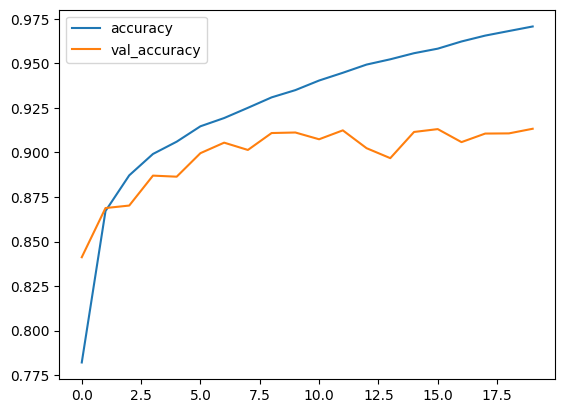

In [47]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

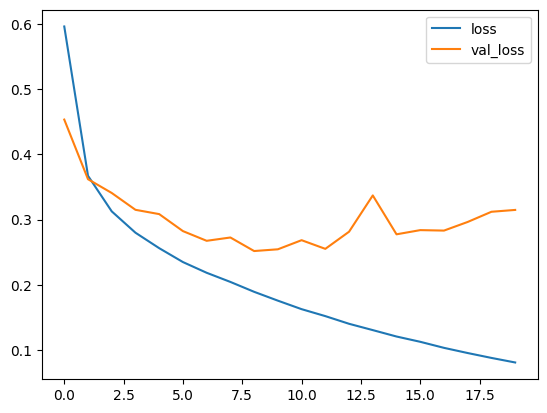

In [48]:
metrics[['loss','val_loss']].plot()
plt.show()

# Data Augmentation

We will be using Data augmentation as a regularization technique to avoid overfitting caused by having too few samples to learn from. In Keras, this can be done by adding a number of data augmentation layers at the
start of your model.

image augmentation layers in [keras](https://keras.io/api/layers/preprocessing_layers/image_augmentation/)!


Note: **ImageDataGenerator** is deprecated in tensorflow 2.1: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator



In [49]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        #layers.RandomRotation(0.1),
        #layers.RandomZoom(0.2),
    ]
)

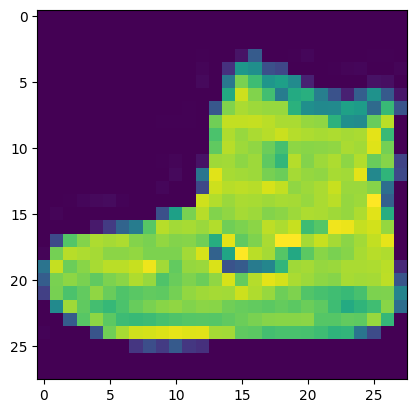

In [50]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [51]:
image = x_train[0]
image.shape

(28, 28, 1)

In [52]:
data_augmentation(image).numpy().shape

(28, 28, 1)

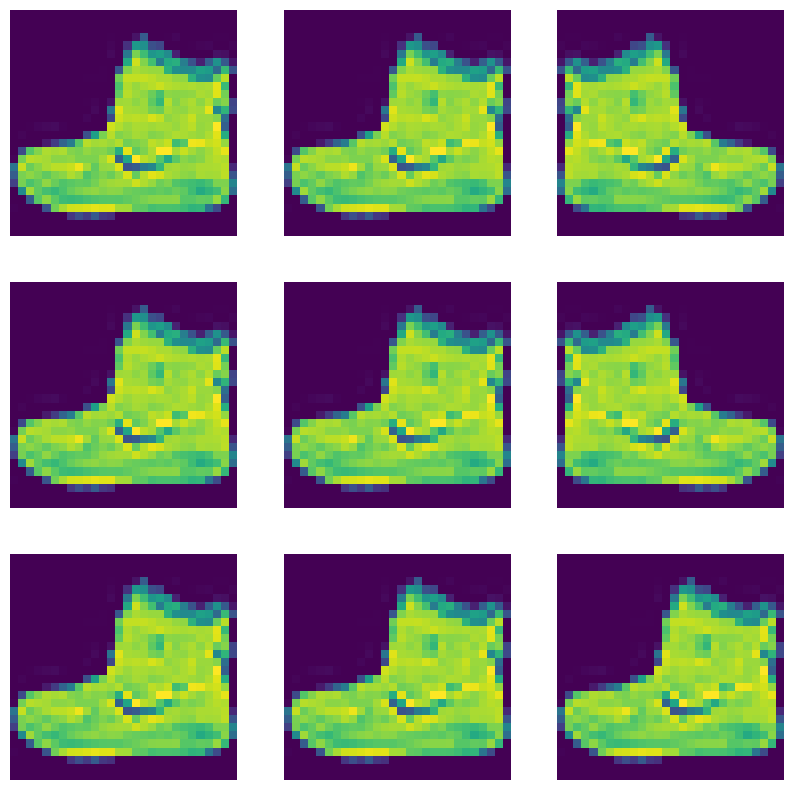

In [53]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(augmented_images.numpy().reshape(28,28))
    plt.axis("off")

In [54]:
x= data_augmentation(x_train)
x.shape


TensorShape([60000, 28, 28])

In [55]:
x = tf.expand_dims(x, axis=-1)
x.shape

TensorShape([60000, 28, 28, 1])

In [56]:
x = tf.squeeze(x, axis=-1)
x.shape

TensorShape([60000, 28, 28])

In [57]:
def CNN_builder_augmented():
  inputs= keras.Input(shape=(28,28,1), name='Input layer')
  x = data_augmentation(inputs)
  x = layers.Rescaling(1./255)(x)  # Add rescaling to normalize the data
  # Explicitly set the shape to ensure the augmented data is in the correct format
  x = layers.Reshape((28, 28, 1))(x)
  x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
  x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
  x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
  x = layers.Flatten(name="flattening_layer")(x)
  x = layers.Dropout(0.5)(x)

  outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

  model = keras.Model(inputs= inputs , outputs=outputs, name='CNN_augmented_model')

  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [58]:
model_augmented = CNN_builder_augmented()
model_augmented.summary()


Model: "CNN_augmented_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flattening_layer (Flatten)      │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

## Model fit


In [59]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_augmented.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [60]:
history = model_augmented.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe),
          epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1008 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3020
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2305 - loss: 2.1050 - val_accuracy: 0.5848 - val_loss: 1.1684
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5567 - loss: 1.1719 - val_accuracy: 0.6392 - val_loss: 0.9887
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6095 - loss: 1.0270 - val_accuracy: 0.6430 - val_loss: 0.9192
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6530 - loss: 0.9033 - val_accuracy: 0.6870 - val_loss: 0.8236
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6826 - loss: 0.8260 - val_accuracy: 0.7210 - val_loss: 0.7463
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7133 - loss: 0.7493 - val_accuracy: 0.7270 - val_loss: 0.7235
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7374 - loss: 0.6931 - val_accuracy: 0.

In [61]:
model_augmented.evaluate(x_test, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8181 - loss: 0.5122


[0.50359046459198, 0.8203999996185303]

For this dataset, the data augmentation was not that helpful because of multiple reasons:
1. The original train set is not that small (60k images)
2. very low resolution and centered data!
3. we added the drop out layer to avoid overfitting, this means that we need to run the model for more epochs (50 at least).

Besides, it is not efficient to do data augmentation like this! because we are not taking advantage of GPU computation. In the next notebook, I show you how to do data augmentation using batches for a small dataset.

## Model evaluation

In [62]:
metrics = pd.DataFrame(history.history)

In [63]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.100633,2.302752,0.1000,2.302042
1,0.364250,1.788525,0.5848,1.168366
2,0.574267,1.126285,0.6392,0.988692
3,0.625267,0.988457,0.6430,0.919189
4,0.662467,0.882393,0.6870,0.823599


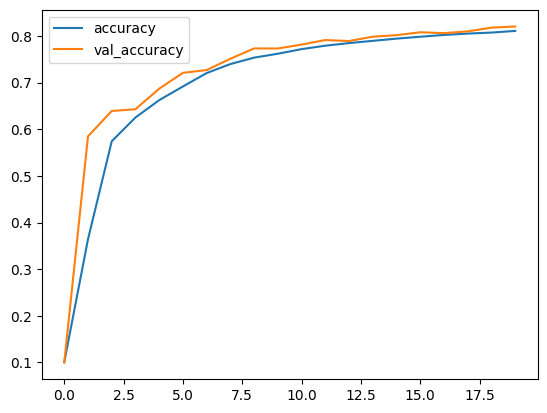

In [64]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

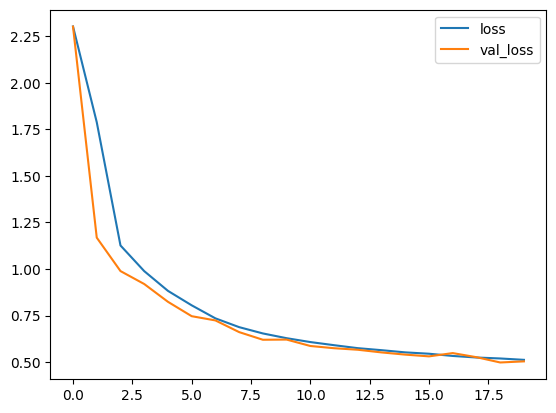

In [65]:
metrics[['loss','val_loss']].plot()
plt.show()

these plots suggest that we should let the model run for more epochs!

# Model predictions

In [66]:
model = keras.models.load_model("CNN_basic.keras")

In [67]:
model.summary()

Model: "my_first_CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flattening_layer (Flatten)      │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,406 (814.09 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,204 (407.05 KB)

In [68]:
predictions_prob = model.predict(x_test)
predictions_prob[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7.3449189e-09, 4.2027404e-10, 1.0035129e-10, 7.6206236e-10,
       5.4257134e-11, 4.9340244e-05, 5.3138460e-10, 6.5665343e-04,
       9.0802109e-07, 9.9929309e-01], dtype=float32)

In [69]:
predictions_prob[0].argmax()

9

In [70]:
y_test[0]

9

let's generate prediction classes:
* For binary classification, np.where(y_pred > threshold, 1,0)
* For multiclass classification, np.argmax(predictions, axis=1)

https://stackoverflow.com/questions/68776790/model-predict-classes-is-deprecated-what-to-use-instead




In [71]:
predictions = np.argmax(predictions_prob, axis=1)
predictions[0:5]

array([9, 2, 1, 1, 6], dtype=int64)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.87      0.86      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.89      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.73      0.75      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [74]:
confusion_matrix(y_test,predictions)

array([[818,   0,  15,  23,   3,   1, 135,   0,   5,   0],
       [  2, 975,   0,  16,   4,   0,   1,   0,   2,   0],
       [ 13,   0, 861,   9,  49,   0,  67,   0,   1,   0],
       [  8,   0,  10, 923,  30,   0,  26,   0,   3,   0],
       [  2,   1,  48,  19, 890,   0,  40,   0,   0,   0],
       [  0,   0,   0,   0,   0, 978,   0,  13,   0,   9],
       [ 80,   0,  57,  28,  73,   0, 752,   0,  10,   0],
       [  0,   0,   0,   0,   0,   9,   0, 964,   0,  27],
       [  1,   0,   2,   4,   4,   1,   3,   2, 982,   1],
       [  1,   0,   0,   0,   0,   3,   0,  30,   0, 966]], dtype=int64)

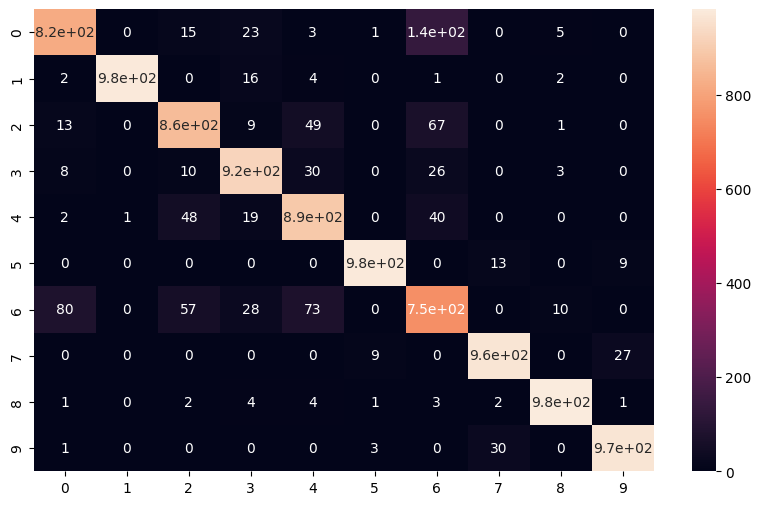

In [75]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

it seems that our basic CNN model has hard time distinguishing T-shirt, Shirts, pullover, dress and coat which makes sense.

Recall:
**Labels**

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


Let's look into some of the misclassified images!

In [76]:
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [77]:
misclassified_images = [i for i, x in enumerate(y_test!=predictions) if x==True]
misclassified_images[:9]

[23, 25, 29, 42, 44, 49, 57, 66, 67]

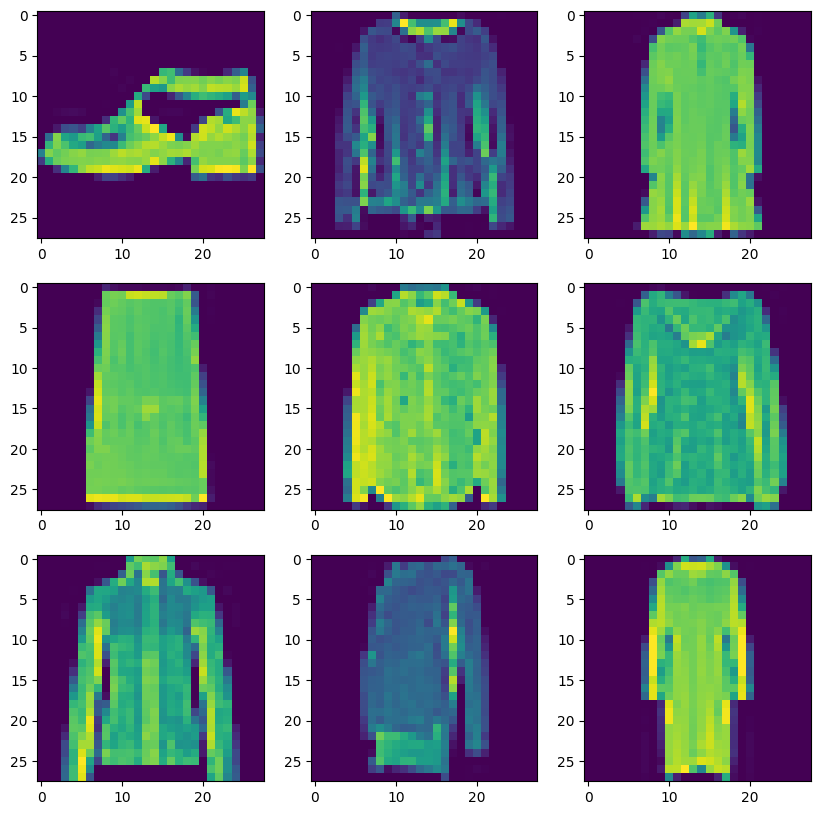

In [78]:
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28))
  actuals.append(y_test[number])
plt.show()

In [79]:
list(predictions[misclassified_images[:9]])

[5, 2, 4, 6, 4, 6, 6, 6, 4]

In [80]:
actuals

[9, 4, 3, 3, 6, 2, 4, 2, 3]

Recall:
**Labels**

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


# Done